In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
sklearn.__version__ 

'0.21.3'

In [3]:
Play=pd.read_csv('weather_data.csv')

In [4]:
Play.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No


In [5]:
X=Play.iloc[:,:4]
y=Play['Play']
X.shape

(14, 4)

In [6]:
x=pd.get_dummies(X)
x.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,1,0,0,0,1,0,1
4,0,1,0,1,0,0,0,1,1,0


In [7]:
y

0      No
1      No
2     Yes
3     Yes
4      No
5      No
6     Yes
7     Yes
8     Yes
9     Yes
10    Yes
11     No
12    Yes
13    Yes
Name: Play, dtype: object

In [22]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y, test_size=0.30,random_state=0)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train1, y_train1)

In [25]:
Y_pred=clf.predict(x_test1)
Y_pred

array(['No', 'No', 'Yes', 'Yes', 'Yes'], dtype=object)

In [26]:
y_test1

8     Yes
6     Yes
4      No
11     No
2     Yes
Name: Play, dtype: object

In [27]:
print(y.shape)

(14,)


In [28]:
cm=confusion_matrix(y_test1,Y_pred)
print("Confusion Matrix is:",cm, sep='\n')

Confusion Matrix is:
[[0 2]
 [2 1]]


In [29]:
print("Accuracy:", clf.score(x_test1,y_test1)*100)

Accuracy: 20.0


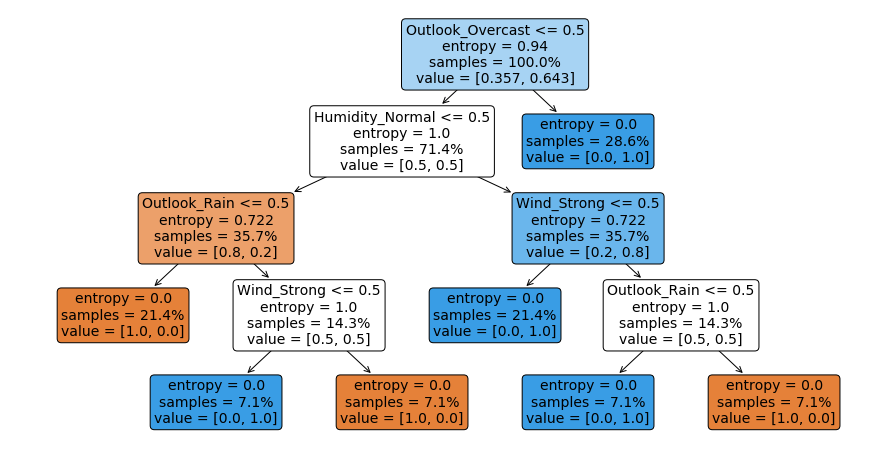

In [30]:
from sklearn import tree
plt.figure(figsize=(15,8))

tree.plot_tree(clf.fit(x,y),feature_names=cols,filled=True, precision=3,proportion=True,rounded=True)
plt.show()

In [31]:
cols=list(x.columns.values)

In [32]:
cols

['Outlook_Overcast',
 'Outlook_Rain',
 'Outlook_Sunny',
 'Temperature_Cool',
 'Temperature_Hot',
 'Temperature_Mild',
 'Humidity_High',
 'Humidity_Normal',
 'Wind_Strong',
 'Wind_Weak']